In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv("/content/train.csv")

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.rename(columns={
    "BedroomAbvGr":"Bedrooms",
    "FullBath":"Bathrooms",
    "TotalBsmtSF":"Square_Footage"

},inplace=True)

In [7]:
X  = df[["Bedrooms","Bathrooms","Square_Footage"]]
X

,Bedrooms,Bathrooms,Square_Footage
0,3,2,856
1,3,2,1262
2,3,2,920
3,3,1,756
4,4,2,1145
...,...,...,...
1455,3,2,953
1456,3,2,1542
1457,4,2,1152
1458,2,1,1078


In [8]:
X.shape

(1460, 3)

In [9]:
y = df.rename(columns={
    "SalePrice": "Price_of_house"
},inplace = True)

In [10]:
y = df[["Price_of_house"]]
y

,Price_of_house
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=100)

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
X_train

,Bedrooms,Bathrooms,Square_Footage
133,2,2,1267
290,3,2,1079
24,3,1,1060
1093,1,1,864
1288,2,2,1501
...,...,...,...
802,3,2,728
53,0,0,1842
350,2,2,1869
79,2,1,440


In [15]:
y_train

,Price_of_house
133,220000
290,233230
24,154000
1093,146000
1288,278000
...,...
802,189000
53,385000
350,318061
79,110000


In [19]:
y_pred = lm.predict(X_test)

In [16]:
X_train_prediction = lm.predict(X_train)

In [25]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)

2709164263.607025
0.5786084514146472


In [26]:
input_data = [[3,	1,	1060]]
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction  = lm.predict(input_data_reshape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
print("The Prediction bases on Bathrooms, Bedrooms, Square_footage AS you give instruction in the tasks\n ")
print(prediction,"house_price_prediction")

The Prediction bases on Bathrooms, Bedrooms, Square_footage AS you give instruction in the tasks
 
[[147862.82780119]] house_price_prediction


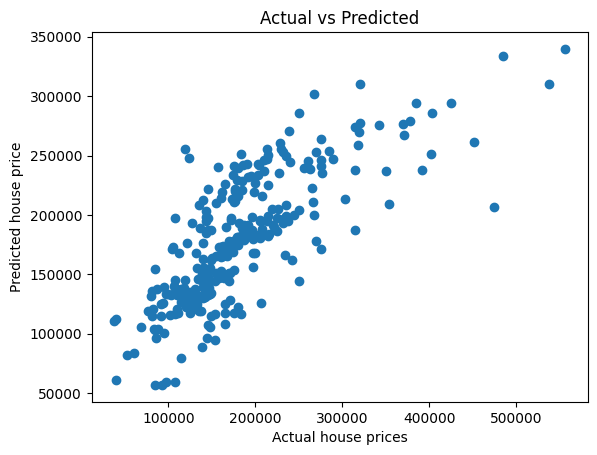

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual house prices")
plt.ylabel("Predicted house price")
plt.title("Actual vs Predicted")
plt.show()